### Test Different Factors that Set the Atmosphere Curve
The data and code are mostly pulled from: https://github.com/lsst-pst/syseng_throughputs.git
<br>**Prerequisites:** $\texttt{rubin_sim}$, $\texttt{syseng_throughputs}$

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from rubin_sim.photUtils import Bandpass
import syseng_throughputs.bandpassUtils as bu
mpl.rc_file('https://raw.githubusercontent.com/ywx649999311/configs/master/viz/yuBasic.rc')

In [2]:
def addAerosol(atmosphere, X, tau0=0.05, alpha=1.0, wavelen0=440.0, plotAtmosphere=True):
    """Add aerosol component on top of existing atmosphere curve that without it."""
    # Calculate the aerosol contribution -- sb with aerosols = sb*exp(-tau)
    tau = tau0 * np.power((wavelen0/atmosphere.wavelen), alpha)
    # Generate new atmosphere bandpass with aerosols.
    atmosphere_aerosol = Bandpass()
    atmosphere_aerosol.setBandpass(wavelen = atmosphere.wavelen,
                                   sb = atmosphere.sb * np.exp(-tau*X))

    if plotAtmosphere:
        # Plot for a check:
        atmodict = {'Original atmosphere':atmosphere,
                    'With aerosols': atmosphere_aerosol}
        bu.plotBandpasses(atmodict)

    return atmosphere_aerosol

### 1. Explore Changing the weight of aerosol

In [5]:
# get file dir
defaultDirs = bu.setDefaultDirs()
atmosDir, atmosFile = defaultDirs['atmosphere'], 'pachonModtranAtm_12.dat'

In [40]:
# read initial atmosphere file X = 1.2, no aerosol
atmosphere = bu.readAtmosphere(atmosDir, atmosFile)

# add areosol of various weight
atm_alpha_10 = addAerosol(atmosphere, 1.2, alpha=1, plotAtmosphere=False)
atm_alpha_07 = addAerosol(atmosphere, 1.2, alpha=.7, plotAtmosphere=False)
atm_alpha_04 = addAerosol(atmosphere, 1.2, alpha=.4, plotAtmosphere=False)

Text(0, 0.5, 'Fractional Transmission')

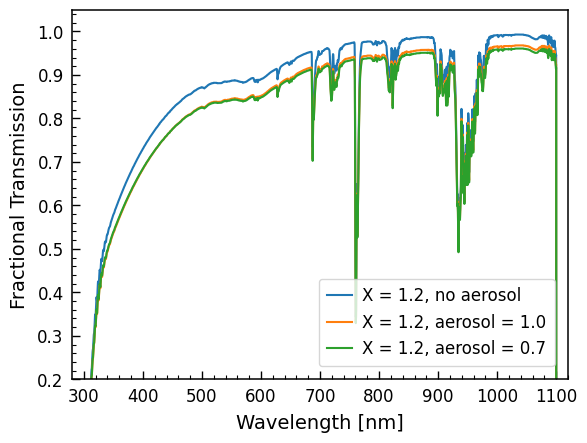

In [41]:
# visualize the difference
plt.plot(atmosphere.wavelen, atmosphere.sb, label='X = 1.2, no aerosol')
plt.plot(atm_alpha_10.wavelen, atm_alpha_10.sb, label='X = 1.2, aerosol = 1.0')
plt.plot(atm_alpha_07.wavelen, atm_alpha_07.sb, label='X = 1.2, aerosol = 0.7')
plt.legend(loc='best')
plt.ylim(0.2, 1.05)
plt.xlim(280, 1120)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Fractional Transmission')

#### **Conclusion/Remark:**
Adding aerosol does make a significant difference in the extinction curves, but changing the weight from 1 to 0.7 impose only minimal effect.